In [6]:
import numpy as np
import matplotlib.pyplot as plt

class ScratchLinearRegression:
    def __init__(self, num_iter=1000, lr=0.01, no_bias=False, verbose=False):
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.theta = None

    # 【problem1】Hypothetical function
    def _linear_hypothesis(self, X):
        return X @ self.theta

    # 【problem2】Steepest descent
    def _gradient_descent(self, X, error):
        m, n = X.shape
        for j in range(n):
            gradient = np.sum(error * X[:, j])
            self.theta[j] -= self.lr * (gradient / m)

    #【problem 3】Estimated
    def predict(self, X):
        if not self.no_bias:
            X = np.c_[np.ones((X.shape[0], 1)), X]
        return self._linear_hypothesis(X)

    # 【problem 4】Mean squared error
    def _MSE(self, y_pred, y):
        return np.mean((y_pred - y) ** 2)

    # 【problem 5】Objective function
    def _loss_func(self, y_pred, y):
        return self._MSE(y_pred, y) / 2

    # Problem 6 Learning and Estimation
    def fit(self, X, y, X_val=None, y_val=None):
        if not self.no_bias:
            X = np.insert(X, 0, 1, axis=1)
            if X_val is not None:
                X_val = np.insert(X_val, 0, 1, axis=1)

        self.theta = np.zeros(X.shape[1])

        for i in range(self.iter):
            y_pred = self._linear_hypothesis(X)
            error = y_pred - y
            self._gradient_descent(X, error)

            self.loss[i] = self._loss_func(y_pred, y)

            if X_val is not None and y_val is not None:
                val_pred = self._linear_hypothesis(X_val)
                self.val_loss[i] = self._loss_func(val_pred, y_val)

            if self.verbose and i % 100 == 0:
                print(f"Iteração {i}, Loss: {self.loss[i]:.4f}")

    # Problem 7: Plot learning curve
    def plot_learning_curve(self):
        plt.plot(self.loss, label='Train Loss')
        if np.any(self.val_loss):
            plt.plot(self.val_loss, label='Validation Loss')
        plt.xlabel('Épocas')
        plt.ylabel('Loss')
        plt.title('Curva de Aprendizado')
        plt.legend()
        plt.grid()
        plt.show()


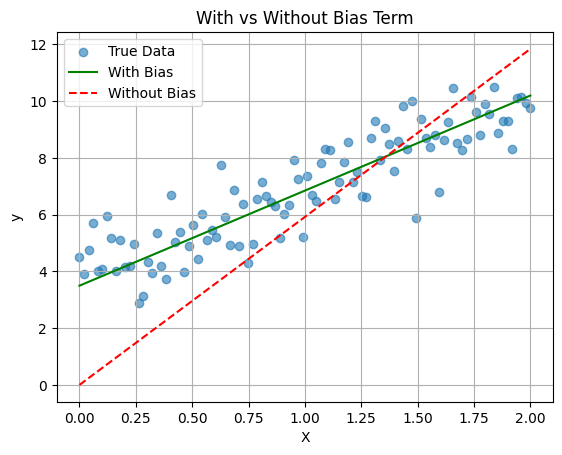

In [8]:
#Problem 8 — Removal of Bias Term
model_with_bias = ScratchLinearRegression(num_iter=500, lr=0.01, no_bias=False, verbose=False)
model_with_bias.fit(X, y)
y_pred_with_bias = model_with_bias.predict(X)

model_no_bias = ScratchLinearRegression(num_iter=500, lr=0.01, no_bias=True, verbose=False)
model_no_bias.fit(X, y)
y_pred_no_bias = model_no_bias.predict(X)


plt.scatter(X, y, label='True Data', alpha=0.6)
plt.plot(X, y_pred_with_bias, label='With Bias', color='green')
plt.plot(X, y_pred_no_bias, label='Without Bias', color='red', linestyle='--')
plt.legend()
plt.title('With vs Without Bias Term')
plt.xlabel('X')
plt.ylabel('y')
plt.grid()
plt.show()

Iteração 0, Loss: 25.7874
Iteração 100, Loss: 2.0778
Iteração 200, Loss: 0.8485
Iteração 300, Loss: 0.5185
Iteração 400, Loss: 0.4299
Iteração 500, Loss: 0.4061
Iteração 600, Loss: 0.3997
Iteração 700, Loss: 0.3979
Iteração 800, Loss: 0.3974
Iteração 900, Loss: 0.3972


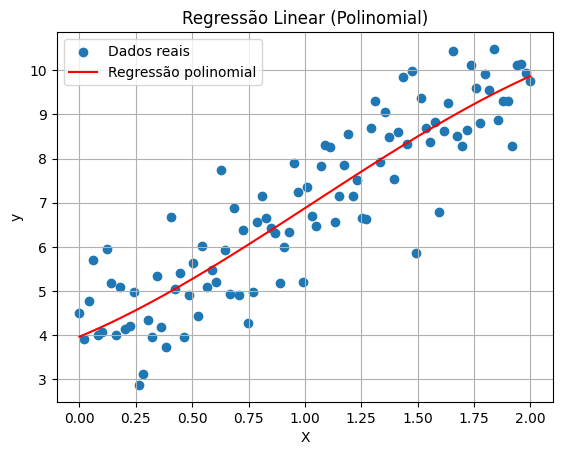

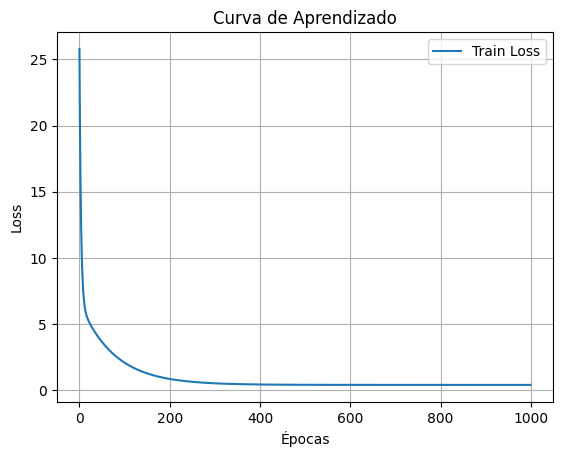

In [7]:
np.random.seed(42)
X = np.linspace(0, 2, 100).reshape(-1, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
y = y.ravel()

# Problem 9: Criar dados polinomiais (grau 3)
X_poly = np.hstack([X, X**2, X**3])

model = ScratchLinearRegression(num_iter=1000, lr=0.01, no_bias=False, verbose=True)
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

plt.scatter(X, y, label='Dados reais')
plt.plot(X, y_pred, color='red', label='Regressão polinomial')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regressão Linear (Polinomial)')
plt.legend()
plt.grid()
plt.show()

model.plot_learning_curve()



##【problem 10】(Advance task) Derivation of update formula
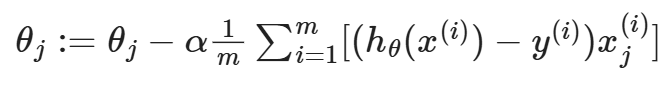


##【problem 11】(Advance task) Problem of local optimum solution

In linear regression, we minimize the mean squared error (MSE), or more precisely:

J(\\theta) = \\frac{1}{2m} \\sum_{i=1}^{m} (h_\\theta(x^{(i)}) - y^{(i)})^2
This is a convex function.